## **Task 7 "Stock Market Prediction using Numerical and Textual Analysis"**
create a hybrid model for stock price / performance prediction 
using numerical analysis of historical stock price, and 
sentimental analysis of news headlines


### Author: Ali Hassan

### Analyze and forecast stock price

Mean Squared Error: 15782964.460387694


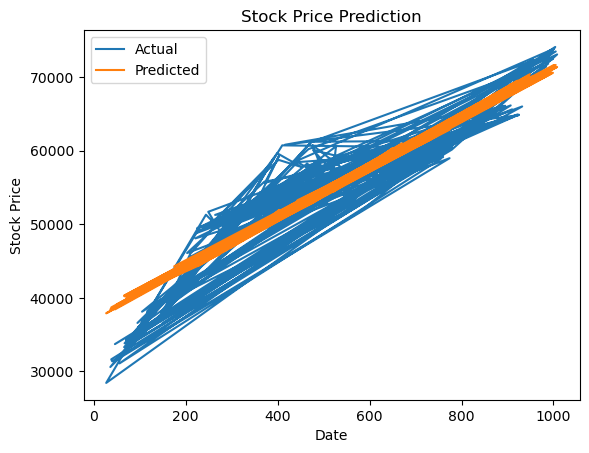

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the CSV file
stock_data = pd.read_csv('S&P BSE SENSEX.csv')

# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the data by date in ascending order
stock_data.sort_values('Date', inplace=True)

# Remove rows with missing values
stock_data.dropna(inplace=True)

# Create additional features for analysis and prediction
stock_data['DayOfWeek'] = stock_data['Date'].dt.dayofweek
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Year'] = stock_data['Date'].dt.year

# Define the features and target variable
features = ['DayOfWeek', 'Month', 'Year']
target = 'Close'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stock_data[features], stock_data[target], test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

# Plot the predicted values against the actual values
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

### Sentimental analysis for news headlines

In [6]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download required resources for sentiment analysis
nltk.download('vader_lexicon')

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Read the news headlines from the dataset
df = pd.read_csv('india-news-headlines.csv')

# Perform sentiment analysis on each headline
sentiments = []
polarities = []
for headline in df['headline_text']:
    # Perform sentiment analysis
    sentiment_scores = sia.polarity_scores(headline)

    # Determine the sentiment label based on the compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        sentiment_label = 'Positive'
    elif compound_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    # Add sentiment and polarity to the lists
    sentiments.append(sentiment_label)
    polarities.append(compound_score)

# Add sentiment and polarity columns to the dataframe
df['Sentiment'] = sentiments
df['Polarity Scores'] = polarities
# Save the updated dataframe to a new CSV file
df.to_csv('india-news-headlines-with-sentiment.csv', index=False)
print(df.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\ِAli
[nltk_data]     Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text Sentiment  \
0  Status quo will not be disturbed at Ayodhya; s...  Positive   
1                Fissures in Hurriyat over Pak visit   Neutral   
2              America's unwanted heading for India?  Negative   
3                 For bigwigs; it is destination Goa   Neutral   
4               Extra buses to clear tourist traffic  Positive   

   Polarity Scores  
0           0.2924  
1           0.0000  
2          -0.2263  
3           0.0000  
4           0.3818  


In [35]:
import pandas as pd

# Read the news data from the CSV file
news_data = pd.read_csv('india-news-headlines-with-sentiment.csv')

# Data preprocessing for news data
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'], format='%Y%m%d')  # Convert publish_date column to datetime format
news_data = news_data.dropna()  # Remove rows with missing values
news_data = news_data[['publish_date', 'Polarity Scores']]  # Keep only the relevant columns
print(news_data.tail())

        publish_date  Polarity Scores
3650965   2022-03-31          -0.5267
3650966   2022-03-31           0.5106
3650967   2022-03-31          -0.2732
3650968   2022-03-31           0.0000
3650969   2022-03-31           0.0000


### Merge the datasets have matching dates for alignment

In [47]:
import pandas as pd

# Read the datasets
stock_data = pd.read_csv('S&P BSE SENSEX.csv')
news_data = pd.read_csv('india-news-headlines-with-sentiment.csv')
# Convert the date columns to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'], format='%Y%m%d')

# Merge the datasets based on the common date column
merged_data = pd.merge(stock_data[['Date', 'Close']], news_data[['publish_date', 'Polarity Scores']], left_on='Date', right_on='publish_date', how='inner')

# Display the merged data
print(merged_data.head())
# Check the number of samples in the merged dataset
print("Number of samples in the merged dataset:", len(merged_data))

        Date        Close publish_date  Polarity Scores
0 2020-02-18  40894.37891   2020-02-18          -0.0572
1 2020-02-18  40894.37891   2020-02-18           0.6124
2 2020-02-18  40894.37891   2020-02-18          -0.5106
3 2020-02-18  40894.37891   2020-02-18           0.0000
4 2020-02-18  40894.37891   2020-02-18           0.0000
Number of samples in the merged dataset: 262411


### Analyze and predict with using merged data

Mean Squared Error: 3005.444219024328


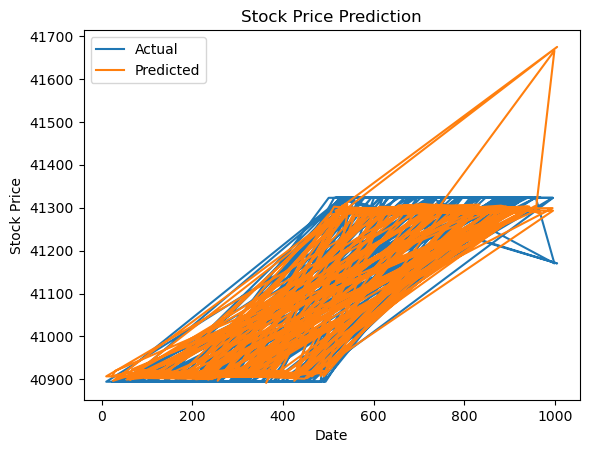

In [63]:
# Remove rows with missing values
merged_data.dropna(inplace=True)

# Create additional features for analysis and prediction
merged_data['DayOfWeek'] = merged_data['Date'].dt.dayofweek
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Year'] = merged_data['Date'].dt.year

# Define the features and target variable
X = merged_data[['DayOfWeek', 'Month', 'Year', 'Polarity Scores']]
y = merged_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

# Plot the predicted values against the actual values
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()